# Ejemplo de Grid Evaluation

## Cargar dataset y revisarlo
Dataset https://archive.ics.uci.edu/dataset/267/banknote+authentication
Como es un .txt, le añadí una linea con los headers de las columnas

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data_banknote_authentication.txt')
df.head(10)

,Variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## Preparar datasets de entrenamiento y prueba

In [4]:
X = df.drop("class",axis=1)
X

,Variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [5]:
y = df["class"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

Estandarizar datos

In [6]:
from sklearn.preprocessing import StandardScaler # type: ignore

scaler = StandardScaler()
X = scaler.fit_transform(X)
X[:3]

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317]])

## Ajustes para la búsqueda de hiperparámetros

Definir modelo de Regresion Logistica

In [7]:
from sklearn.linear_model import LogisticRegression # type: ignore
lrc = LogisticRegression()
lrc

LogisticRegression()

Usar 10 folds para hacer un mejor ajuste de los hiperparámetros

In [8]:
from sklearn.model_selection import KFold # type: ignore
folds = KFold(n_splits=10) #creación de los folds
folds

KFold(n_splits=10, random_state=None, shuffle=False)

Definir diccionario con los hiperparámetros a ajustar

In [9]:
dicHiper = {}
dicHiper['solver'] = ['newton-cg','lbfgs', 'liblinear']
dicHiper['penalty'] = ['none','l1', 'l2', 'elasticnet']
dicHiper

{'solver': ['newton-cg', 'lbfgs', 'liblinear'],
 'penalty': ['none', 'l1', 'l2', 'elasticnet']}

Definir busqueda a realizar

In [10]:
from sklearn.model_selection import GridSearchCV # type: ignore
hpSearch = GridSearchCV(lrc,dicHiper,n_jobs=-1,scoring="accuracy",cv=folds,verbose=3)
hpSearch

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=3)

## Ajustar (Entrenar) Modelo

Realizar la búsqueda usando GridSearchCV

In [11]:
result = hpSearch.fit(X,y)
print(f"Mejor score {result.best_score_}")
print(f"Mejores hiperparámetros: {result.best_params_}\n\n\n")

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END .....penalty=none, solver=newton-cg;, score=nan total time=   0.0s
[CV 9/10] END .....penalty=none, solver=newton-cg;, score=nan total time=   0.0s
[CV 10/10] END ....penalty=none, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/10] END .........penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END .........penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END .........penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END .........penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END .........penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END .........penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END .........penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END .........penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END .........penalty=none, solver=lb

/Users/gustavogutierrez/miniconda3/envs/Ambiente-Conda/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gustavogutierrez/miniconda3/envs/Ambiente-Conda/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gustavogutierrez/miniconda3/envs/Ambiente-Conda/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/gustavogutierrez/miniconda3/envs/Ambiente-Conda

Ajustar modelo con los hiperparámetros encontrados

In [12]:
from sklearn.model_selection import train_test_split # type: ignore
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

lrc = LogisticRegression(penalty="l1",solver="liblinear")
lrc.fit(X_train,y_train)
y_pred = lrc.predict(X_test)

## Evaluación del modelo con los hiperparámetros seleccionados

In [13]:
from sklearn.metrics import classification_report # type: ignore
from sklearn.metrics import confusion_matrix # type: ignore
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       150
           1       0.98      0.99      0.98       125

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



#### Matriz de confusion usando Regresión Logística

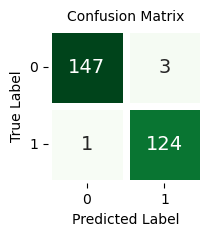

In [14]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

cm = confusion_matrix(y_test, y_pred)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(2,2))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 14})
plt.xlabel("Predicted Label")
plt.xticks(size = 10)
plt.yticks(size = 10, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 10)
plt.show()
